In [1]:
using MLDatasets, Images, TestImages, Plots

train_x, train_y = MNIST.traindata()
test_x,  test_y  = MNIST.testdata()

(Normed{UInt8,8}[0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]

Normed{UInt8,8}[0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]

Normed{UInt8,8}[0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]

...

Normed{UInt8,8}[0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]

Normed{UInt8,8}[0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]

Normed{UInt8,8}[0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0], [7, 2, 1, 0, 4, 1, 4, 9, 5, 9  …  7, 8, 9, 0, 1, 2, 3, 4, 5, 6])

In [2]:
# Flatten the matrix input data into a vector
new_train_x = []
new_train_y = []
for i = 1:60000
    push!(new_train_x, reshape(train_x[:,:,i], 784))
    y = zeros(10)
    y[train_y[i]+1] = 1.0 # One hot encoding 
    push!(new_train_y,y)
end

In [3]:
function σ(v)
    return 1.0/(1.0 + exp(-v))
end

function dσ(v)
    return σ(v)*(1.0 - σ(v))
end

function hadamard_product(v, w)
    return [v[i]*w[i] for i = 1:size(v)[1]]
end

function forward_pass(x, W, b)
    z1 = [0.0]
    a1 = new_train_x[x]
    
    z2 = W[2]*a1 + b[2]
    a2 = σ.(z2)
    
    z3 = W[3]*a2 + b[3]
    a3 = σ.(z3)
    
    z4 = W[4]*a3 + b[4]
    a4 = σ.(z4)
    
    z5 = W[5]*a4 + b[5]
    a5 = σ.(z5)
    
    z6 = W[6]*a5 + b[6]
    a6 = σ.(z6)

    return [z1, z2, z3, z4, z5, z6], [a1, a2, a3, a4, a5, a6]
end

function cost(x, W, b)
    Z, A = forward_pass(x, W, b)
    aL = A[6]
    return (0.5)*sum(((new_train_y[x][i] - aL[i])^2) for i = 1:size(aL)[1])
end

cost (generic function with 1 method)

In [4]:
W2 = randn(125, 784)
W3 = randn(75, 125)
W4 = randn(150, 75)
W5 = randn(55, 150)
W6 = randn(10, 55)

b2 = randn(125)
b3 = randn(75)
b4 = randn(150)
b5 = randn(55)
b6 = randn(10)

w = [[0.0], W2, W3, W4, W5, W6]
b = [[0.0], b2, b3, b4, b5, b6]

6-element Array{Array{Float64,1},1}:
 [0.0]                                                                                                                                                                                                           
 [0.725871, 1.27011, -1.64512, -0.832913, -1.85319, 1.51859, 0.442231, 2.54599, -0.513923, 0.043756  …  0.588252, 1.25517, -1.40952, 1.075, -0.670546, -0.00309542, -0.380076, 0.912327, 0.0984837, 0.0500507]   
 [-0.430805, -0.674379, 0.245308, -1.49742, -0.629605, -1.01439, 0.568714, -0.382816, -1.10084, 0.829182  …  0.41198, 0.911473, 0.13015, 0.343688, -0.730857, -1.64401, -0.208975, 0.357575, -0.485631, 0.775264]
 [1.12875, -1.42629, 0.144915, -0.594571, 0.184073, -0.729409, -1.19253, -1.22932, 1.785, -1.47757  …  -0.134018, 0.668888, 1.04093, 0.378992, 0.620102, -0.157444, -0.440695, -0.161536, 0.535987, 0.561824]    
 [0.11895, -0.346654, -0.517419, 0.885372, 0.18957, -1.03377, 0.0135139, 0.625436, -0.134068, -3.09181  …  -0.361816, 0.111

In [5]:
Z,A = forward_pass(200,w,b)

(Array{Float64,1}[[0.0], [-3.6848, 2.66825, -17.9057, -0.102079, 10.0027, 8.70272, -24.8771, 3.29454, 7.54523, 26.4265  …  26.8837, 1.2727, -3.61977, -8.0189, -12.7308, -2.30964, 20.4861, -5.28106, 11.5938, 8.38747], [1.71964, 6.04939, 0.0843986, -5.20461, -7.39807, -1.2459, -6.23699, 0.563801, 14.8383, -6.26207  …  0.311778, 7.66587, 7.89891, -12.5528, 6.7253, 0.921684, 2.71398, -7.62674, -3.12594, -5.01756], [-2.05995, -1.75206, -0.386392, -0.550653, 9.35205, 4.31614, -1.16768, -4.73298, -6.55858, -0.930325  …  7.58227, 2.96923, 9.674, -7.99134, 1.79426, 5.116, 3.64158, 0.0682397, 10.2013, -0.621815], [6.5649, -3.39715, 7.69367, 0.755368, -1.78621, 6.71805, -6.76995, 8.89203, 11.8211, -7.11562  …  -9.6088, 10.209, -1.89287, 12.9302, 1.90643, -4.01215, 1.01553, -2.80721, 4.27141, -7.33015], [12.3178, -1.32914, 0.437537, 6.50403, -1.15952, 9.8201, -1.11405, 10.1127, -0.954726, -10.483]], Array{Float64,1}[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0  …  0.0, 0.0, 0.0, 0.0, 0.0, 0.0

In [6]:
cost(200,w,b)

2.1949300819882063

In [7]:
function output_error(x,Z,A,W)
    δ6 = hadamard_product((A[6]-new_train_y[x]),dσ.(Z[6]))
    δ5 = hadamard_product(W[6]'*δ6,dσ.(Z[5]))
    δ4 = hadamard_product(W[5]'*δ5,dσ.(Z[4]))
    δ3 = hadamard_product(W[4]'*δ4,dσ.(Z[3]))
    δ2 = hadamard_product(W[3]'*δ3,dσ.(Z[2]))
    return [[0.0],δ2,δ3,δ4,δ5,δ6]
end

output_error (generic function with 1 method)

In [8]:
deltas = output_error(200,Z,A,w)

6-element Array{Array{Float64,1},1}:
 [0.0]                                                                                                                                                                                                                                                             
 [0.000298825, 0.009852, -4.03744e-10, 0.00365518, 3.91862e-6, -7.10705e-6, -1.86233e-12, 0.000576167, 5.32209e-5, 7.2298e-13  …  1.60293e-13, -0.0210822, -0.00149299, -3.67684e-5, -3.10926e-7, 0.00559787, -5.36688e-11, -0.000597988, -8.85394e-7, -2.01686e-5]
 [0.0123347, -0.000440681, -0.0163401, -0.00030132, -1.6282e-5, 0.0241096, -2.29524e-5, 0.0144666, 1.69923e-8, 0.000163467  …  0.024113, -5.3934e-5, -4.50544e-5, -1.14308e-6, 8.30119e-5, -0.0208791, -0.00260582, -1.88182e-5, -0.00482262, 5.85928e-5]          
 [0.00454098, 0.0096234, -0.0163307, -0.00224953, -4.92353e-6, 0.000763161, 0.00571554, -0.000359737, 0.000237144, -0.00493189  …  5.7387e-5, -0.00717962, 2.76444e-6, 1.48935e-5, 0.00

In [9]:
deltas[6]

10-element Array{Float64,1}:
  4.4713641772204615e-6
  0.03463809737574496  
 -0.0935336294200456   
  0.0014906865049061464
  0.04339398728449407  
  5.433918412981328e-5 
  0.045976127558544924 
  4.055493069590488e-5 
  0.055778106836489816 
  7.84424572518483e-10 

In [10]:
function prediction(x,W,B)
    Z,A = forward_pass(x,W,B)
    print("The model predicts ", findmax(A[6])[2]-1,
        " and real classification is ",findmax(new_train_y[x])[2]-1)
    colorview(Gray, train_x[:,:,x]')    
end

prediction (generic function with 1 method)

The model predicts 0 and real classification is 2

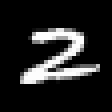

In [11]:
prediction(200,w,b)

In [12]:
learn_rate = 0.1
cost_history = []
iterations = 10000
for j = 1:iterations
        i = rand(1:60000)
        ith_cost = cost(i,w,b)
        Z,A = forward_pass(i,w,b)
        deltas = output_error(i,Z,A,w)

        b[2] -= learn_rate*deltas[2]
        b[3] -= learn_rate*deltas[3]
        b[4] -= learn_rate*deltas[4]
        b[5] -= learn_rate*deltas[5]
        b[6] -= learn_rate*deltas[6]

        w[2] -= learn_rate*deltas[2]*A[1]'
        w[3] -= learn_rate*deltas[3]*A[2]'
        w[4] -= learn_rate*deltas[4]*A[3]'
        w[5] -= learn_rate*deltas[5]*A[4]'
        w[6] -= learn_rate*deltas[6]*A[5]'
        
        push!(cost_history,ith_cost)
end

The model predicts 6 and real classification is 0

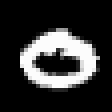

In [13]:
rand_ind = rand(1:60000)
prediction(rand_ind,w,b)

In [14]:
function times_right(w,b)
    count = []
    for i =1:60000
        z,a = forward_pass(i,w,b)
        if (findmax(a[6])[2]-1)==(findmax(new_train_y[i])[2]-1)
            push!(count,1)
        end
    end
    return print("Accuracy: ",sum(count)/60000,"%")
end

times_right (generic function with 1 method)

In [15]:
times_right(w,b)

Accuracy: 0.6391166666666667%

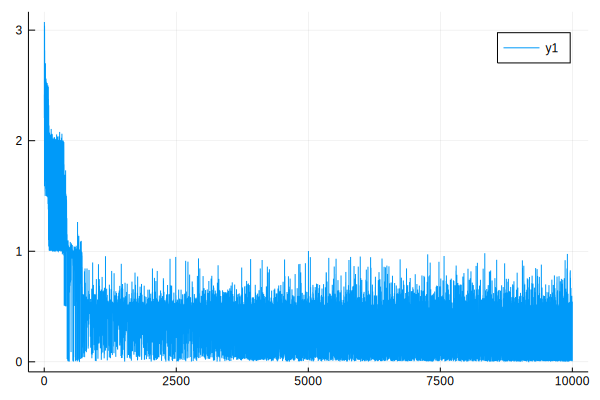

In [16]:
plot(cost_history)

In [17]:
big_cost = 0.97
print("Proportion of cost greater than: ", big_cost)
length(findall(x->x>big_cost,cost_history))/iterations

Proportion of cost greater than: 0.97

0.0595

In [18]:
low_cost = 0.10
print("Proportion of cost lower than: ", low_cost)
length(findall(x->x<low_cost,cost_history))/iterations

Proportion of cost lower than: 0.1

0.2298